In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

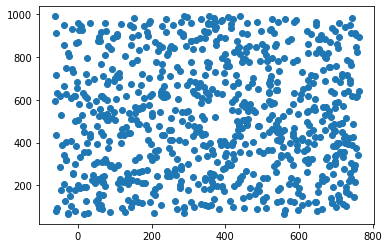

In [2]:
df = pd.read_csv("datasets/paw_shaped/paw02a-800-7-0-BI.csv")
df = df.rename({'y': 'Y'}, axis=1) 
df["Y"].replace({'negative' : int(0), "positive" : int(1)}, inplace=True, regex=True)

y = df.values[:,-1].astype(int)
X = df.drop("Y", axis=1)

plt.scatter(X['dim1'], X['dim2'])

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

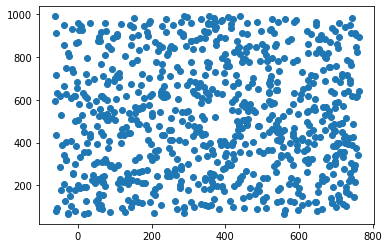

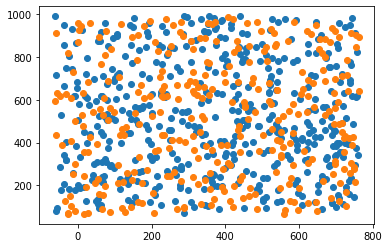

In [4]:
plt.scatter(X['dim1'], X['dim2'])
plt.show()
plt.scatter(X_train['dim1'], X_train['dim2'])
plt.scatter(X_test['dim1'], X_test['dim2'])
plt.show()


<AxesSubplot:xlabel='dim1', ylabel='dim2'>

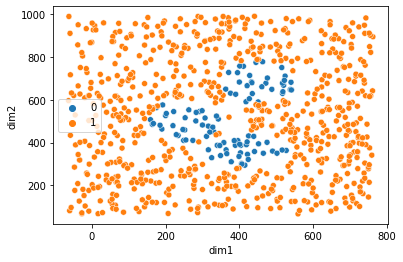

In [5]:
#sns.scatterplot(x=X['dim1'], y=X['dim2'], sizes=(20,6), palette="tab10", hue=y)
sns.scatterplot(data = df, x='dim1', y='dim2', sizes=(20,6), palette="tab10", hue=y)

2021-04-27 16:53:07,608:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


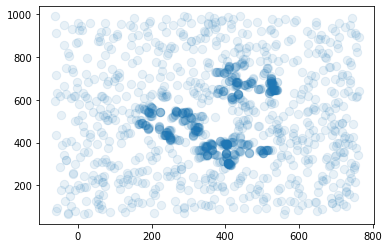

In [6]:
import smote_variants as sv

oversampler = sv.distance_SMOTE()

X_samp, y_samp = oversampler.sample(X.values, y)

plt.scatter(X_samp[:, 0], X_samp[:, 1], s=70, alpha=0.1) # new dataset
#plt.scatter(X['dim1'], X['dim2'], s=70, alpha=0.03)
plt.show()

<AxesSubplot:>

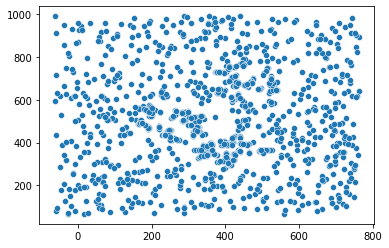

In [7]:
sns.scatterplot(x=X_samp[:, 0], y=X_samp[:, 1], sizes=(20,6), palette="tab10")

leaf_nodes', None), ('min_impurity_decrease', 0.0), ('min_impurity_split', None), ('min_samples_leaf', 1), ('min_samples_split', 2), ('min_weight_fraction_leaf', 0.0), ('random_state', None), ('splitter', 'best')]))"]
["('noisy_data', OrderedDict([('proportion', 0.25), ('random_state', None)]), 'KNeighborsClassifier', OrderedDict([('algorithm', 'auto'), ('leaf_size', 30), ('metric', 'minkowski'), ('metric_params', None), ('n_jobs', None), ('n_neighbors', 5), ('p', 2), ('weights', 'uniform')]))", "('noisy_data', OrderedDict([('proportion', 0.25), ('random_state', None)]), 'DecisionTreeClassifier', OrderedDict([('ccp_alpha', 0.0), ('class_weight', None), ('criterion', 'gini'), ('max_depth', None), ('max_features', None), ('max_leaf_nodes', None), ('min_impurity_decrease', 0.0), ('min_impurity_split', None), ('min_samples_leaf', 1), ('min_samples_split', 2), ('min_weight_fraction_leaf', 0.0), ('random_state', None), ('splitter', 'best')]))"]
["('noisy_data', OrderedDict([('k_neighbors', 7

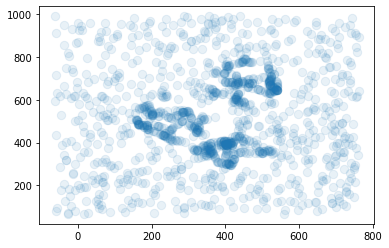

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import shutil

cache_path = os.path.join(os.path.expanduser('~'), 'smote_tests\smote_test')
print(cache_path)

if not os.path.exists(cache_path):
    os.makedirs(cache_path)
else:
    shutil.rmtree(cache_path)

dataset= {'data': X.values, 'target': y, 'name': 'noisy_data'}

# samp_obj and cl_obj contain the oversampling and classifier objects which give the
# best performance together
samp_obj, cl_obj = sv.model_selection(dataset= dataset,
                                        samplers= sv.get_n_quickest_oversamplers(10),
                                        classifiers= [KNeighborsClassifier(), DecisionTreeClassifier()],
                                        cache_path= cache_path,
                                        n_jobs= 5,
                                        max_samp_par_comb= 35)

# training the best techniques using the entire dataset
X_samp, y_samp = samp_obj.sample(dataset['data'], dataset['target'])
cl_obj.fit(X_samp, y_samp)

plt.scatter(X_samp[:, 0], X_samp[:, 1], s=70, alpha=0.1)
plt.show()

In [9]:
### Next step: DO this with all the 6 datasets
### Compare before sampling and after sampling results with reports

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       281
           1       0.94      0.87      0.91        39

    accuracy                           0.98       320
   macro avg       0.96      0.93      0.95       320
weighted avg       0.98      0.98      0.98       320



In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_samp, y_samp, test_size = 0.4, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       291
           1       1.00      0.96      0.98       269

    accuracy                           0.98       560
   macro avg       0.98      0.98      0.98       560
weighted avg       0.98      0.98      0.98       560



In [11]:
# Before

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

def evaluate_model(X_train, y_train, X_test, y_test, model):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	model.fit(X_train, y_train)
	return cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)

models, names = list(), list()
# KNN
models.append(KNeighborsClassifier())
names.append('KNN')
# RF
models.append(RandomForestClassifier(n_estimators=1000))
names.append(' RF')
# ET
models.append(ExtraTreesClassifier(n_estimators=1000))
names.append(' ET')

results = list()
for i in range(len(models)):
	scores = evaluate_model(X_train, y_train, X_test, y_test, models[i])
	results.append(scores)
	print('>%s %.3f (%.3f)' % (names[i], scores.mean(), scores.std()))


"""
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
"""

>KNN 0.946 (0.020)
> RF 0.955 (0.021)
> ET 0.958 (0.020)


'\nsc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)\n\nclassifier = KNeighborsClassifier(n_neighbors = 1)\nclassifier.fit(X_train, y_train)\ny_pred = classifier.predict(X_test)\n\ncm = confusion_matrix(y_test, y_pred)\nprint(cm)\n'